In [17]:
import seml
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

plt.rcParams['figure.dpi'] = 300

# Get results for SCANVI, SCVI, MARS, SVM

In [18]:
results = {}

In [19]:
results['scanvi'] = seml.get_results('scanvi', to_data_frame=True)
for score in list(results['scanvi']['result.integration_scores'].loc[0].columns):
    results['scanvi'][f'result.{score}'] = results['scanvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scanvi']['result.f1-score-macro'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['scanvi']['result.f1-score-weighted'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['scanvi'] = results['scanvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['scanvi'] = results['scanvi'].assign(method='scanvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [20]:
results['scvi'] = seml.get_results('scvi', to_data_frame=True)
for score in list(results['scvi']['result.integration_scores'].loc[0].columns):
    results['scvi'][f'result.{score}'] = results['scvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scvi'] = results['scvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
]]
results['scvi'] = results['scvi'].assign(method='scvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [21]:
results['svm'] = seml.get_results('svm', to_data_frame=True)
results['svm']['result.f1-score-macro'] = results['svm']['result'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['svm']['result.f1-score-weighted'] = results['svm']['result'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['svm'] = results['svm'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['svm'] = results['svm'].assign(method='svm')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [22]:
results['mars'] = seml.get_results('mars', to_data_frame=True).set_index('config.data')
results['mars']['result.integration_scores'] = seml.get_results(
    'mars_metrics', 
    to_data_frame=True).set_index('config.data')['result.integration_scores']
for score in list(results['mars']['result.integration_scores'].iloc[0].columns):
    results['mars'][f'result.{score}'] = results['mars']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['mars']['result.f1-score-macro'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['mars']['result.f1-score-weighted'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['mars'] = results['mars'].reset_index()
results['mars'] = results['mars'][[
    'config.data',
    'result.reference_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['mars'] = results['mars'].assign(method='mars')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

# Get best results from hyperopt

In [23]:
#results['embedcvae'] = seml.get_results('hyperparam_embedcvae', to_data_frame=True)
results['embedcvae'] = seml.get_results('lataq.embedcvae_opt', to_data_frame=True)
results['tranvae'] = seml.get_results('hyperparam_tranvae', to_data_frame=True)
get = 'default'

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

In [24]:
for score in list(results['tranvae']['result.integration_scores'].iloc[0].columns):
    results['tranvae'][f'result.{score}'] = results['tranvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['tranvae']['result.f1-score-macro'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['tranvae']['result.f1-score-weighted'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)

if get == 'integration':
    results['tranvae']['integration_scores_mean'] = results['tranvae'][[
        'result.NMI_cluster/label',
        'result.ARI_cluster/label',
        'result.ASW_label',
        'result.ASW_label/batch',
        'result.PCR_batch',
        'result.isolated_label_F1',
        'result.isolated_label_silhouette',
        'result.graph_conn',
    ]].mean(axis=1)
    results['tranvae'] = (
        results['tranvae']
        .sort_values(by='integration_scores_mean')
        .groupby('config.data')
        .last()
        .reset_index()
    )
elif get == 'classification':
    results['tranvae'] = (
        results['tranvae']
        .sort_values(by='result.f1-score-macro')
        .groupby('config.data')
        .last()
        .reset_index()
    )
elif get == 'default':
    results['tranvae'] = results['tranvae'][
        (results['tranvae']['config.eta'] == 10)
        & (results['tranvae']['config.hidden_layers'] == 3)
        & (results['tranvae']['config.alpha_epoch_anneal'] == 1000)
        & (results['tranvae']['config.clustering_res'] == 2.0)
    ]
results['tranvae'] = results['tranvae'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['tranvae'] = results['tranvae'].assign(method='tranvae')


In [25]:
for score in list(results['embedcvae']['result.integration_scores'].iloc[0].columns):
    results['embedcvae'][f'result.{score}'] = results['embedcvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['embedcvae']['result.f1-score-macro'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['embedcvae']['result.f1-score-weighted'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)

if get == 'integration':
    results['embedcvae']['integration_scores_mean'] = results['embedcvae'][[
        'result.NMI_cluster/label',
        'result.ARI_cluster/label',
        'result.ASW_label',
        'result.ASW_label/batch',
        'result.PCR_batch',
        'result.isolated_label_F1',
        'result.isolated_label_silhouette',
        'result.graph_conn',
    ]].mean(axis=1)
    results['embedcvae'] = (
        results['embedcvae']
        .sort_values(by='integration_scores_mean')
        .groupby('config.data')
        .last()
        .reset_index()
    )
elif get == 'classification':
    results['embedcvae'] = (
        results['embedcvae']
        .sort_values(by='result.f1-score-macro')
        .groupby('config.data')
        .last()
        .reset_index()
    )
elif get == 'default':
    results['embedcvae'] = results['embedcvae'][
        (results['embedcvae']['config.eta'] == 10)
        & (results['embedcvae']['config.hidden_layers'] == 3)
        & (results['embedcvae']['config.alpha_epoch_anneal'] == 1e6)
        & (results['embedcvae']['config.clustering_res'] == 2.0)
    ]
results['embedcvae'] = results['embedcvae'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['embedcvae'] = results['embedcvae'].assign(method='embedcvae')


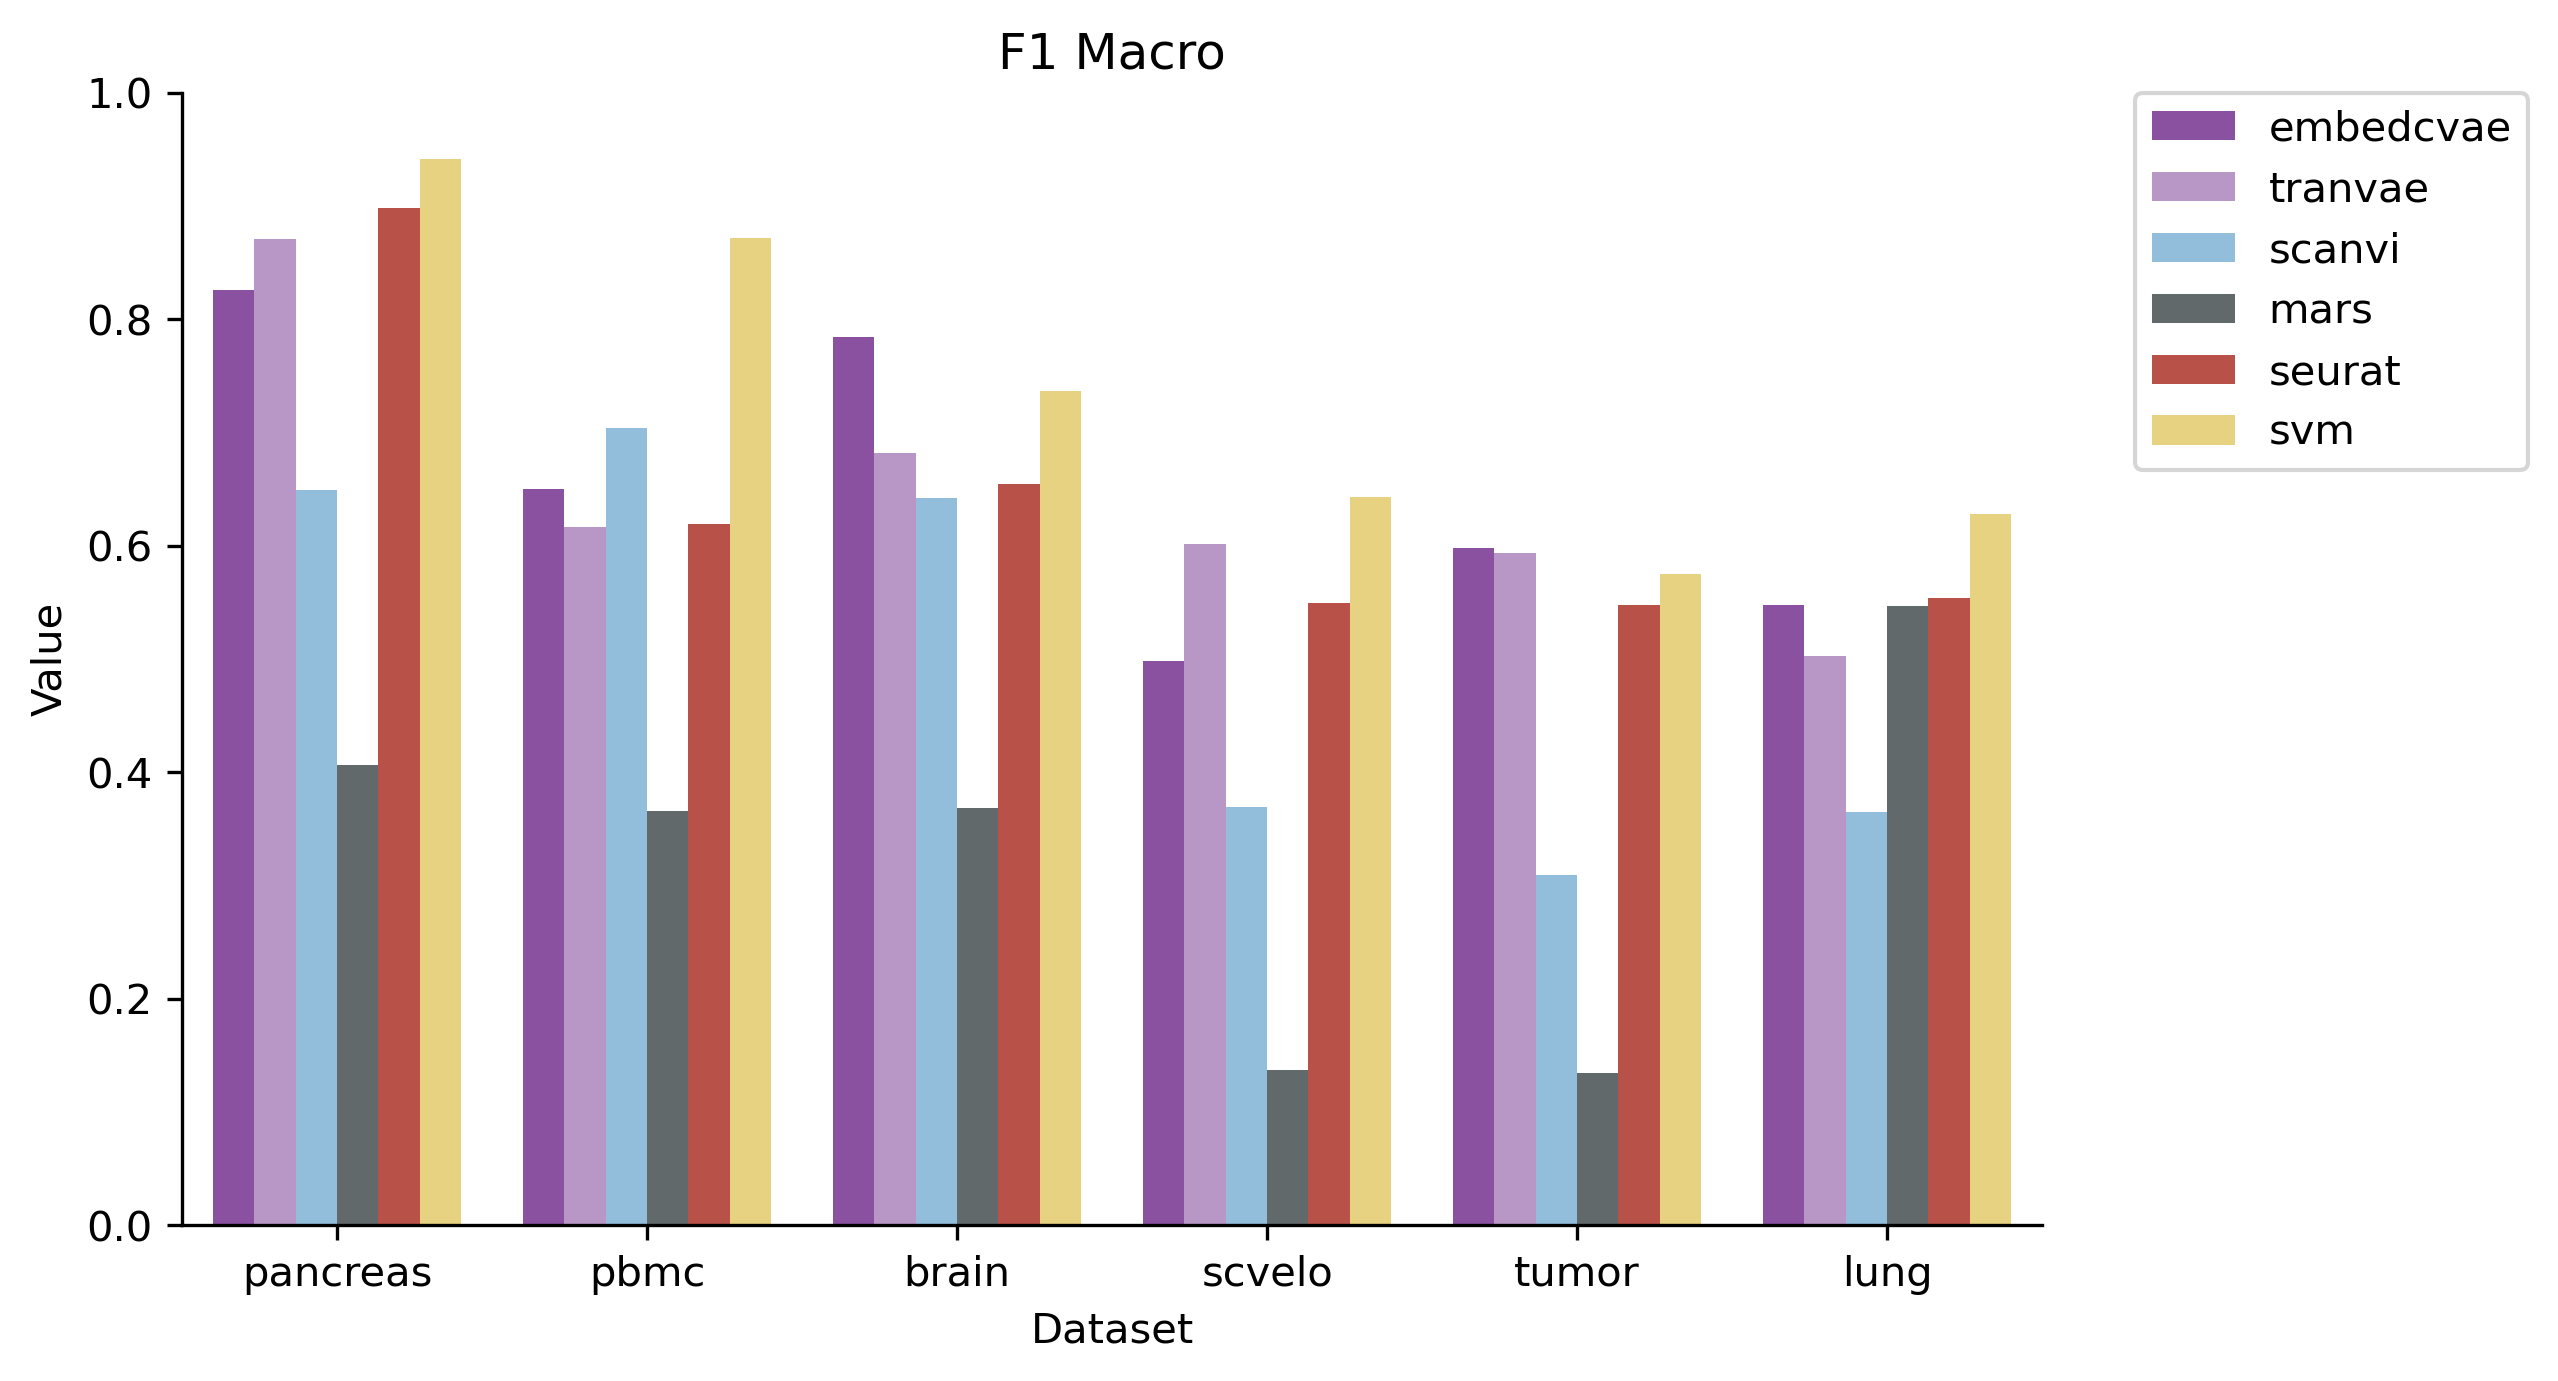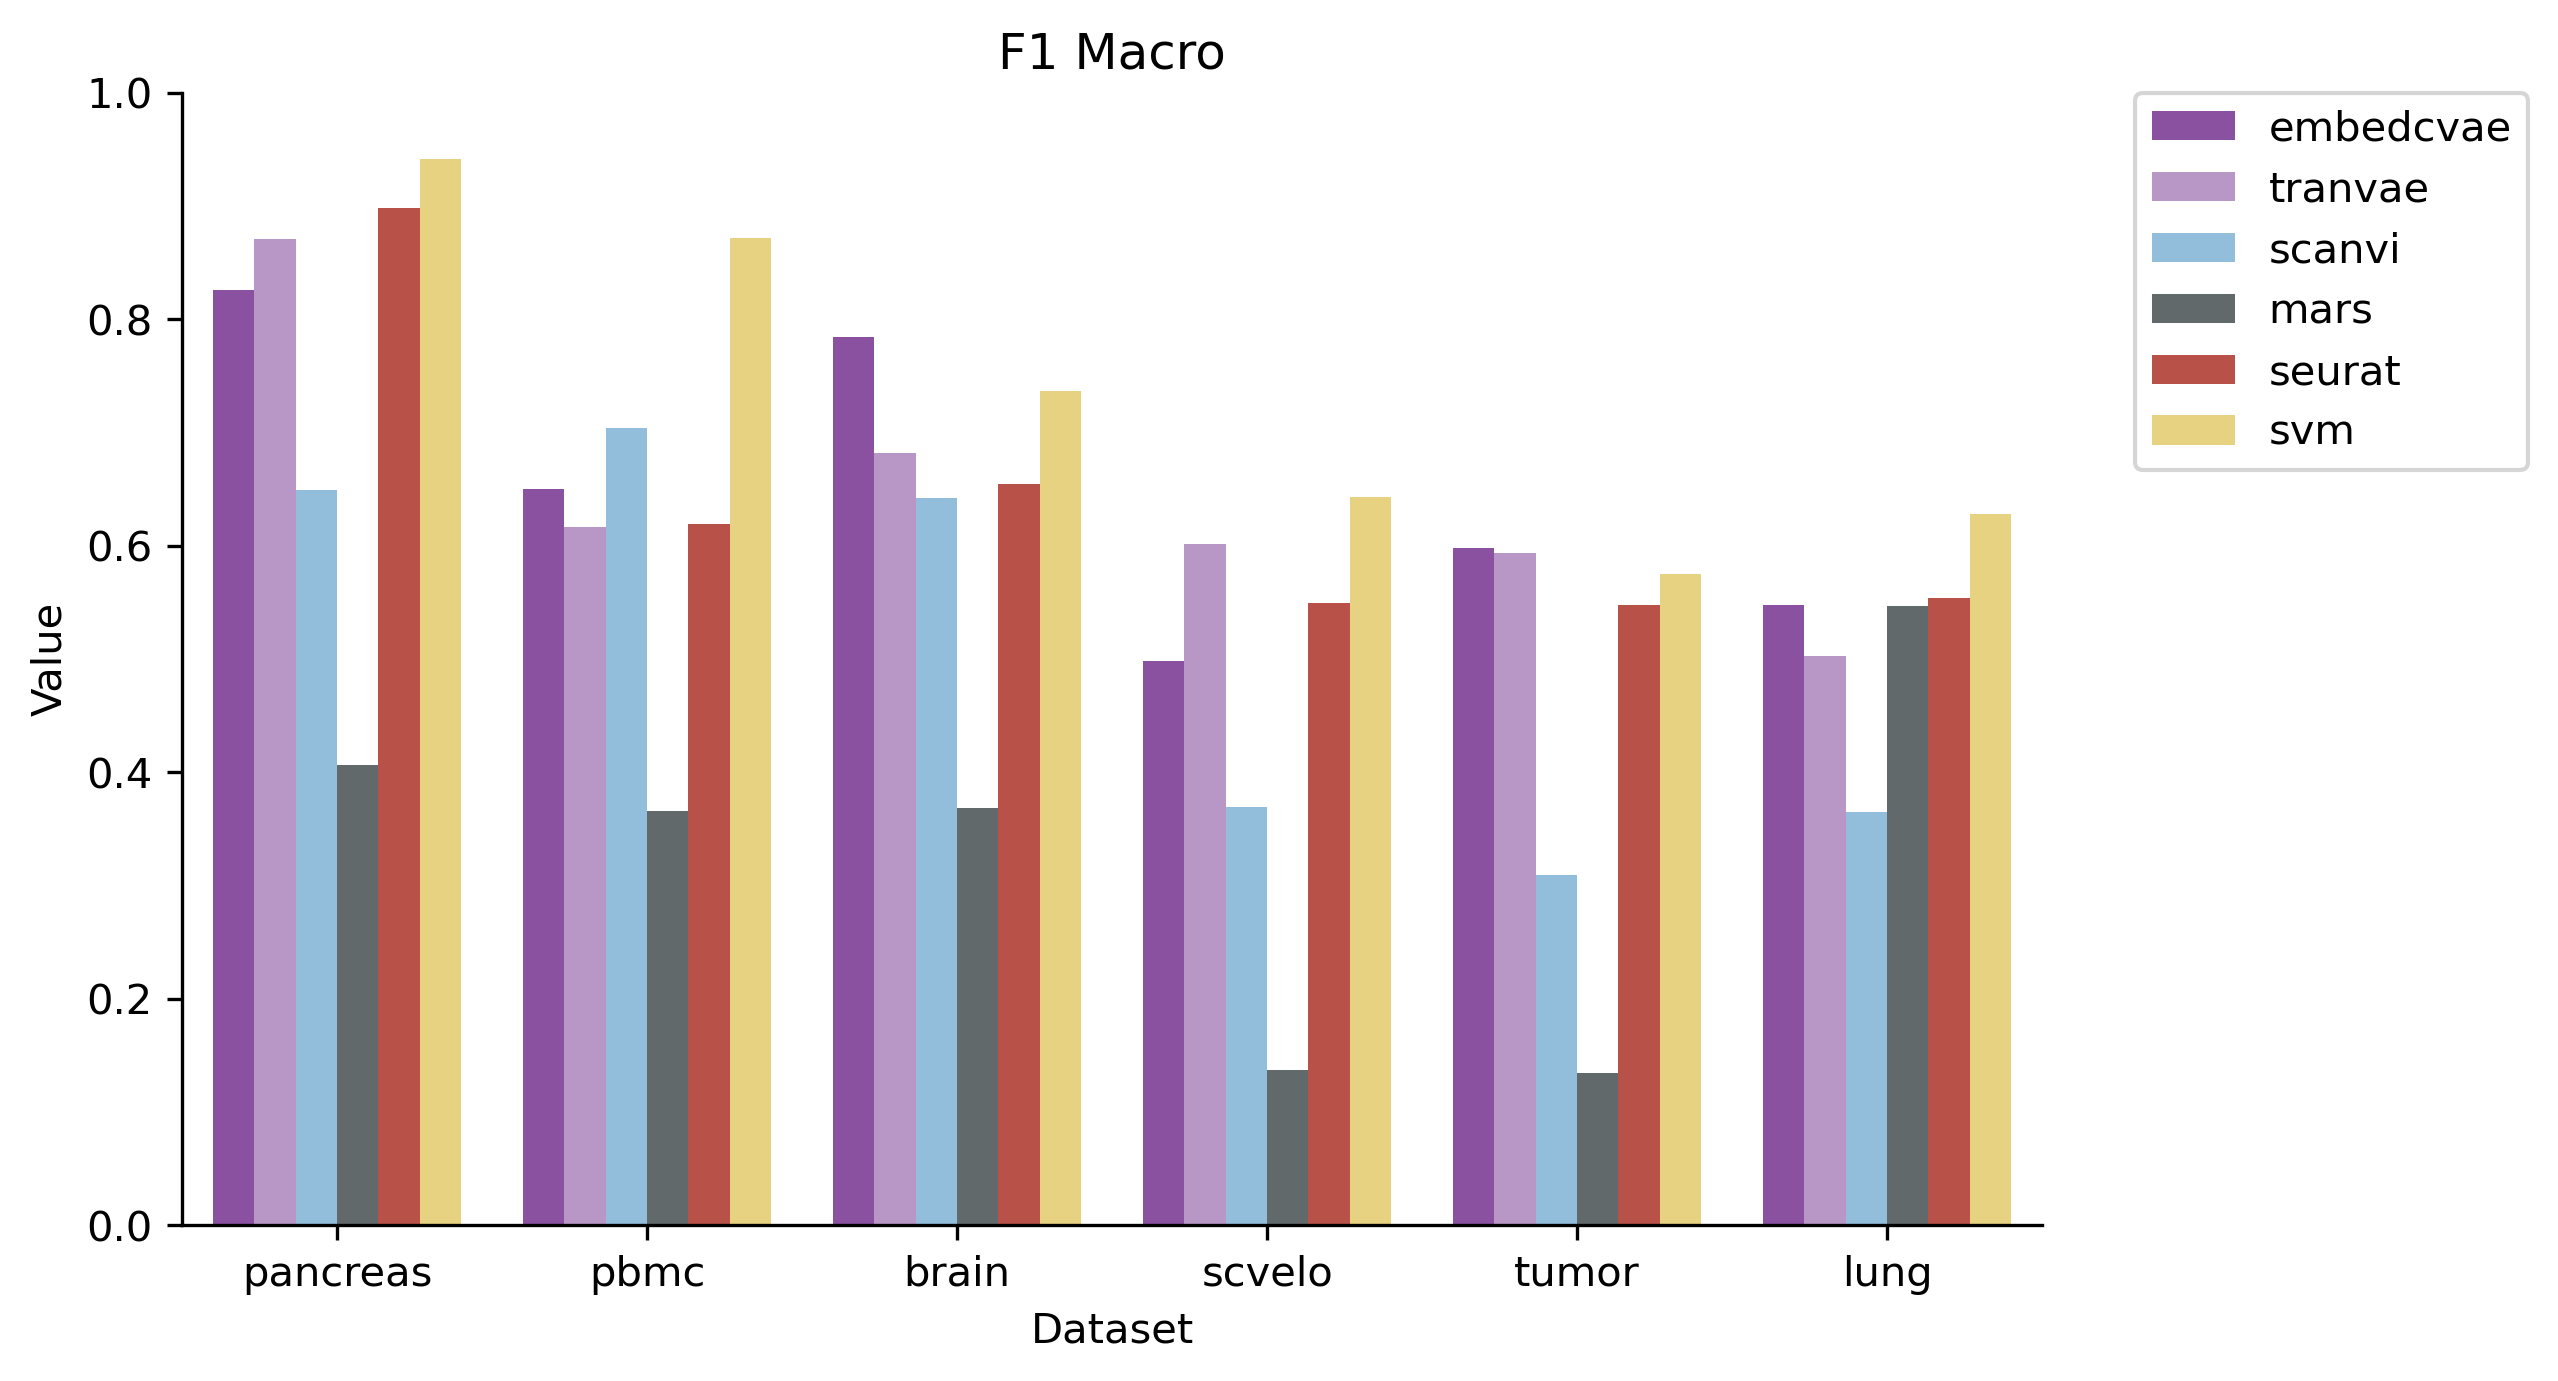# Get results for symphony and seurat

In [26]:
r_scores = pd.read_pickle('seurat/result_seurat_symphony.pickle')


In [27]:
r_scores['method'][~r_scores['classification_report'].isna()] = 'seurat'

In [28]:
results['seurat'] = r_scores[r_scores['method'] == 'seurat']
results['symphony'] = r_scores[r_scores['method'] == 'symphony']

In [29]:
for score in list(results['seurat']['integration_scores'].iloc[0].columns):
    results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
        lambda x: x[score]
    )
results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['seurat']['f1-score-weighted'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['seurat'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['seurat'].columns
    )
]
results['seurat'] = results['seurat'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['seurat'] = results['seurat'].assign(method='seurat')

<ipython-input-29-5403c03ac93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
<ipython-input-29-5403c03ac93d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
<ipython-input-29-5403c03ac93d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [30]:
for score in list(results['symphony']['integration_scores'].iloc[0].columns):
    results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(
        lambda x: x[score]
    )
results['symphony'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['symphony'].columns
    )
]
results['symphony'] = results['symphony'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    #'result.f1-score-macro',
    #'result.f1-score-weighted'
]]
results['symphony'] = results['symphony'].assign(method='symphony')

<ipython-input-30-e4811c48a5a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(


In [31]:
results_df = pd.concat(results.values())

In [32]:
results_df.to_pickle('benchmarks_new.pkl')

# Visualization

In [17]:
integration_methods = ['scanvi', 'scvi', 'seurat', 'symphony', 'tranvae', 'embedcvae']
classification_methods = ['scanvi', 'seurat', 'svm', 'mars', 'tranvae', 'embedcvae']

In [18]:
results_df['integration_scores_mean'] = results_df[[
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
]].mean(axis=1)

In [19]:
results_melt = pd.melt(results_df, id_vars = ['config.data', 'method'])
results_melt = results_melt[~results_melt['variable'].str.contains('time')]
results_melt['method'] = results_melt['method'].astype('category')
results_melt['method'] = results_melt['method'].cat.reorder_categories(
    [
        'embedcvae',
        'tranvae',
        'scvi',
        'scanvi',
        'mars',
        'seurat',
        'symphony',
        'svm'
    ]
)
results_melt

,config.data,method,variable,value
96,pancreas,scanvi,result.NMI_cluster/label,0.925007
97,pbmc,scanvi,result.NMI_cluster/label,0.886107
98,brain,scanvi,result.NMI_cluster/label,0.711047
99,scvelo,scanvi,result.NMI_cluster/label,0.612339
100,tumor,scanvi,result.NMI_cluster/label,0.474573
...,...,...,...,...
619,pbmc,symphony,integration_scores_mean,0.751475
620,scvelo,symphony,integration_scores_mean,0.542324
621,lung,symphony,integration_scores_mean,0.613099
622,tumor,symphony,integration_scores_mean,0.546327


In [20]:
palette_dict = {
    'embedcvae': '#8E44AD',
    'tranvae': '#BB8FCE',
    'scvi': '#3498DB',
    'scanvi': '#85C1E9',
    'mars': '#616A6B',
    'seurat': '#CB4335',
    'symphony': '#F1948A',
    'svm': '#F7DC6F'
}

In [21]:
df_plot = results_melt.pivot(index=['config.data', 'method'], values='value', columns='variable').reset_index()
df_plot = df_plot[df_plot['method'].isin(['embedcvae', 'tranvae','scanvi', 'seurat'])]
df_plot['method'] = df_plot['method'].astype('category').cat.remove_unused_categories()

In [22]:
df_mean = df_plot.groupby('method').mean()
df_std = df_plot.groupby('method').std()
df_bottom = df_plot.groupby('method').quantile(0.05)
df_bottom = df_mean - df_bottom
df_top = df_plot.groupby('method').quantile(0.95)
df_top = df_top - df_mean

In [23]:
df_top

variable,integration_scores_mean,result.ARI_cluster/label,result.ASW_label,result.ASW_label/batch,result.NMI_cluster/label,result.PCR_batch,result.f1-score-macro,result.f1-score-weighted,result.graph_conn,result.isolated_label_F1,result.isolated_label_silhouette
method,,,,,,,,,,,
embedcvae,0.118428,0.281896,0.161643,0.090452,0.162808,0.341505,0.165026,0.184856,0.032328,0.264195,0.150119
tranvae,0.110856,0.259201,0.162373,0.078236,0.163018,0.376482,0.178809,0.202602,0.030157,0.319590,0.136922
scanvi,0.130607,0.314817,0.049637,0.065204,0.183375,0.540970,0.183779,0.235066,0.016233,0.219668,0.109923
seurat,0.096789,0.288222,0.061255,0.055797,0.178339,0.442385,0.200413,0.199937,0.012408,0.319223,0.154076


In [24]:
df_bottom

variable,integration_scores_mean,result.ARI_cluster/label,result.ASW_label,result.ASW_label/batch,result.NMI_cluster/label,result.PCR_batch,result.f1-score-macro,result.f1-score-weighted,result.graph_conn,result.isolated_label_F1,result.isolated_label_silhouette
method,,,,,,,,,,,
embedcvae,0.134440,0.400855,0.168774,0.113488,0.227146,0.337707,0.140111,0.199901,0.040683,0.494328,0.112273
tranvae,0.136290,0.417102,0.150196,0.124443,0.233741,0.345991,0.119005,0.235802,0.036434,0.536862,0.090719
scanvi,0.097741,0.319856,0.060844,0.058204,0.222892,0.253095,0.182970,0.234279,0.032954,0.472006,0.104020
seurat,0.117180,0.285365,0.050916,0.045880,0.180990,0.286913,0.089113,0.192595,0.029779,0.488912,0.101487


In [25]:
np.expand_dims(df_bottom['integration_scores_mean'].values,axis=0).shape

(1, 4)

In [26]:
np.vstack([df_bottom['integration_scores_mean'].values, df_top['integration_scores_mean'].values])

array([[0.13444021, 0.1362903 , 0.09774116, 0.11718003],
       [0.11842807, 0.11085565, 0.13060684, 0.09678915]])

In [27]:
np.vstack([df_bottom['result.f1-score-macro'].values, df_top['result.f1-score-macro'].values])

array([[0.1401109 , 0.11900549, 0.18296957, 0.08911274],
       [0.16502618, 0.17880857, 0.18377884, 0.20041259]])

/home/icb/carlo.dedonno/anaconda3/envs/lataq_clone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


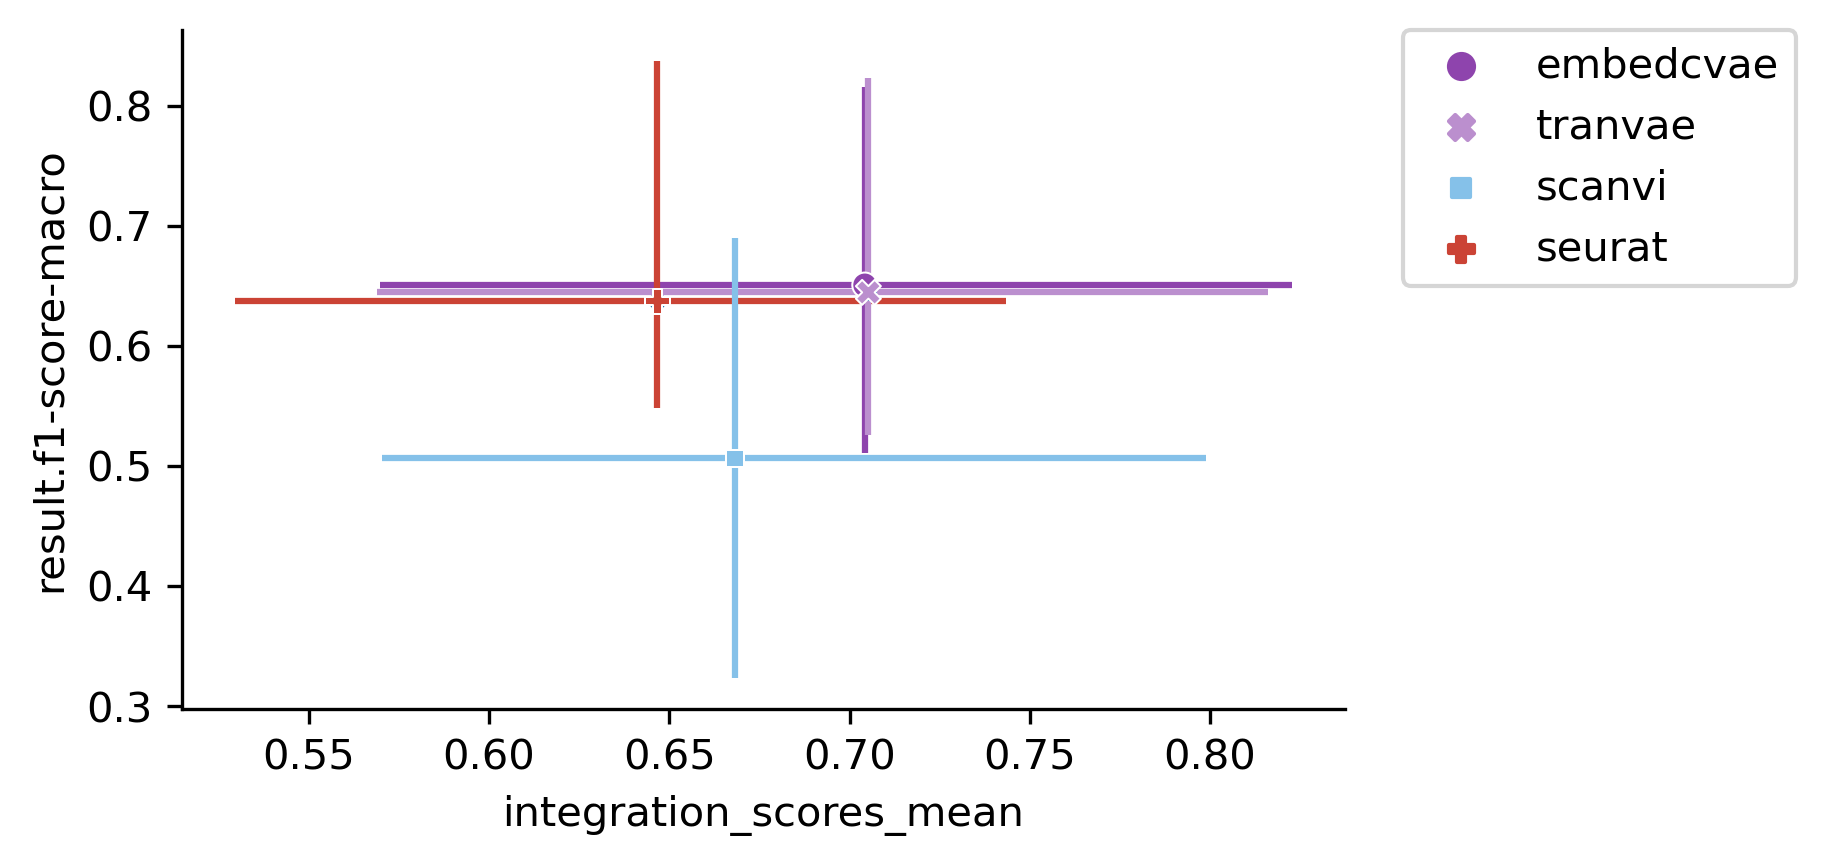

In [28]:
fig, ax= plt.subplots(1, 1, figsize=(5, 3))
ax.errorbar(
    df_mean['integration_scores_mean'], 
    df_mean['result.f1-score-macro'],
    xerr=np.vstack([df_bottom['integration_scores_mean'].values, df_top['integration_scores_mean'].values]),
    yerr=np.vstack([df_bottom['result.f1-score-macro'].values, df_top['result.f1-score-macro'].values]),
    fmt='.',
    ecolor=['#8E44AD', '#BB8FCE', '#85C1E9', '#CB4335'],
    barsabove=False,
    zorder=0,
)
sns.scatterplot(
    df_mean['integration_scores_mean'],
    df_mean['result.f1-score-macro'], 
    hue=df_mean.index,
    palette=palette_dict,
    style=df_mean.index,
    ax=ax,
    zorder=1
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim([0.3, 0.9])
#plt.xlim([0.5, 0.85])
sns.despine()

sns.despine()

/home/icb/carlo.dedonno/anaconda3/envs/lataq_clone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


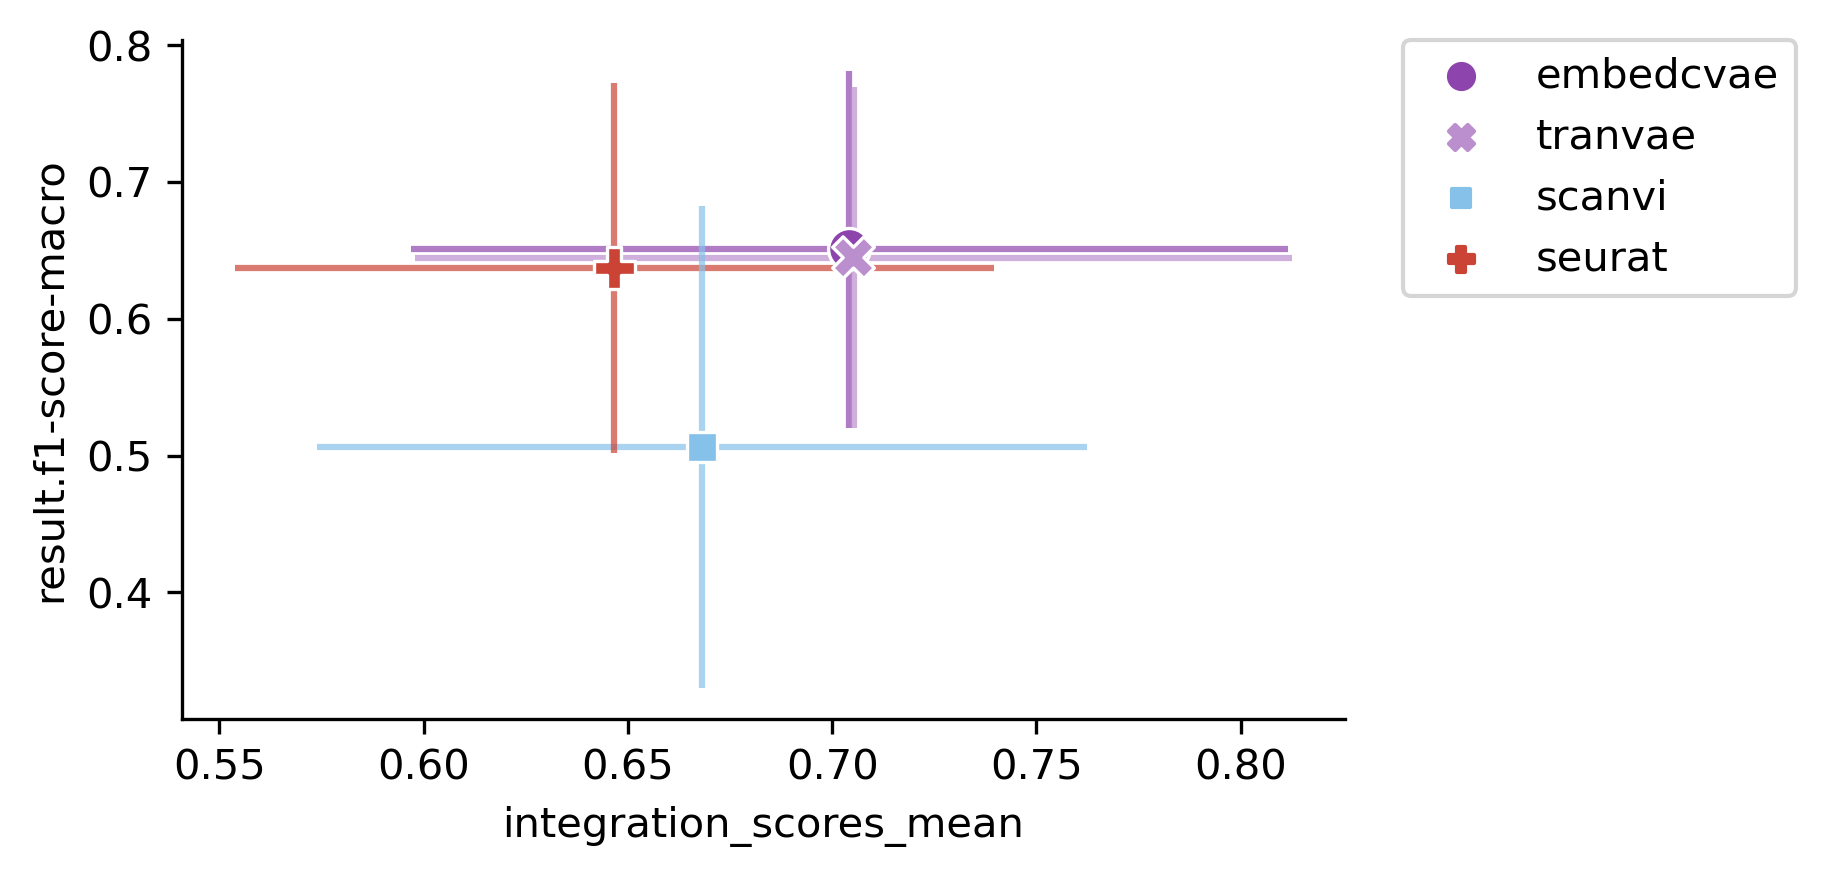

In [29]:
fig, ax= plt.subplots(1, 1, figsize=(5, 3))
ax.errorbar(
    df_mean['integration_scores_mean'], 
    df_mean['result.f1-score-macro'],
    xerr=df_std['integration_scores_mean'],
    yerr=df_std['result.f1-score-macro'],
    fmt='.',
    ecolor=['#8E44AD', '#BB8FCE', '#85C1E9', '#CB4335'],
    barsabove=False,
    zorder=0,
    alpha=0.7,
)
sns.scatterplot(
    df_mean['integration_scores_mean'],
    df_mean['result.f1-score-macro'], 
    hue=df_mean.index,
    s=100,
    palette=palette_dict,
    style=df_mean.index,
    ax=ax,
    zorder=1
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim([0.3, 0.9])
#plt.xlim([0.5, 0.85])
sns.despine()

sns.despine()

In [30]:
df_plot = results_melt[
    (results_melt['method'].isin(integration_methods))
    & (results_melt['variable'] == 'integration_scores_mean')
]

<ipython-input-31-be6eb3add0af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['method'] = df_plot['method'].cat.remove_unused_categories()


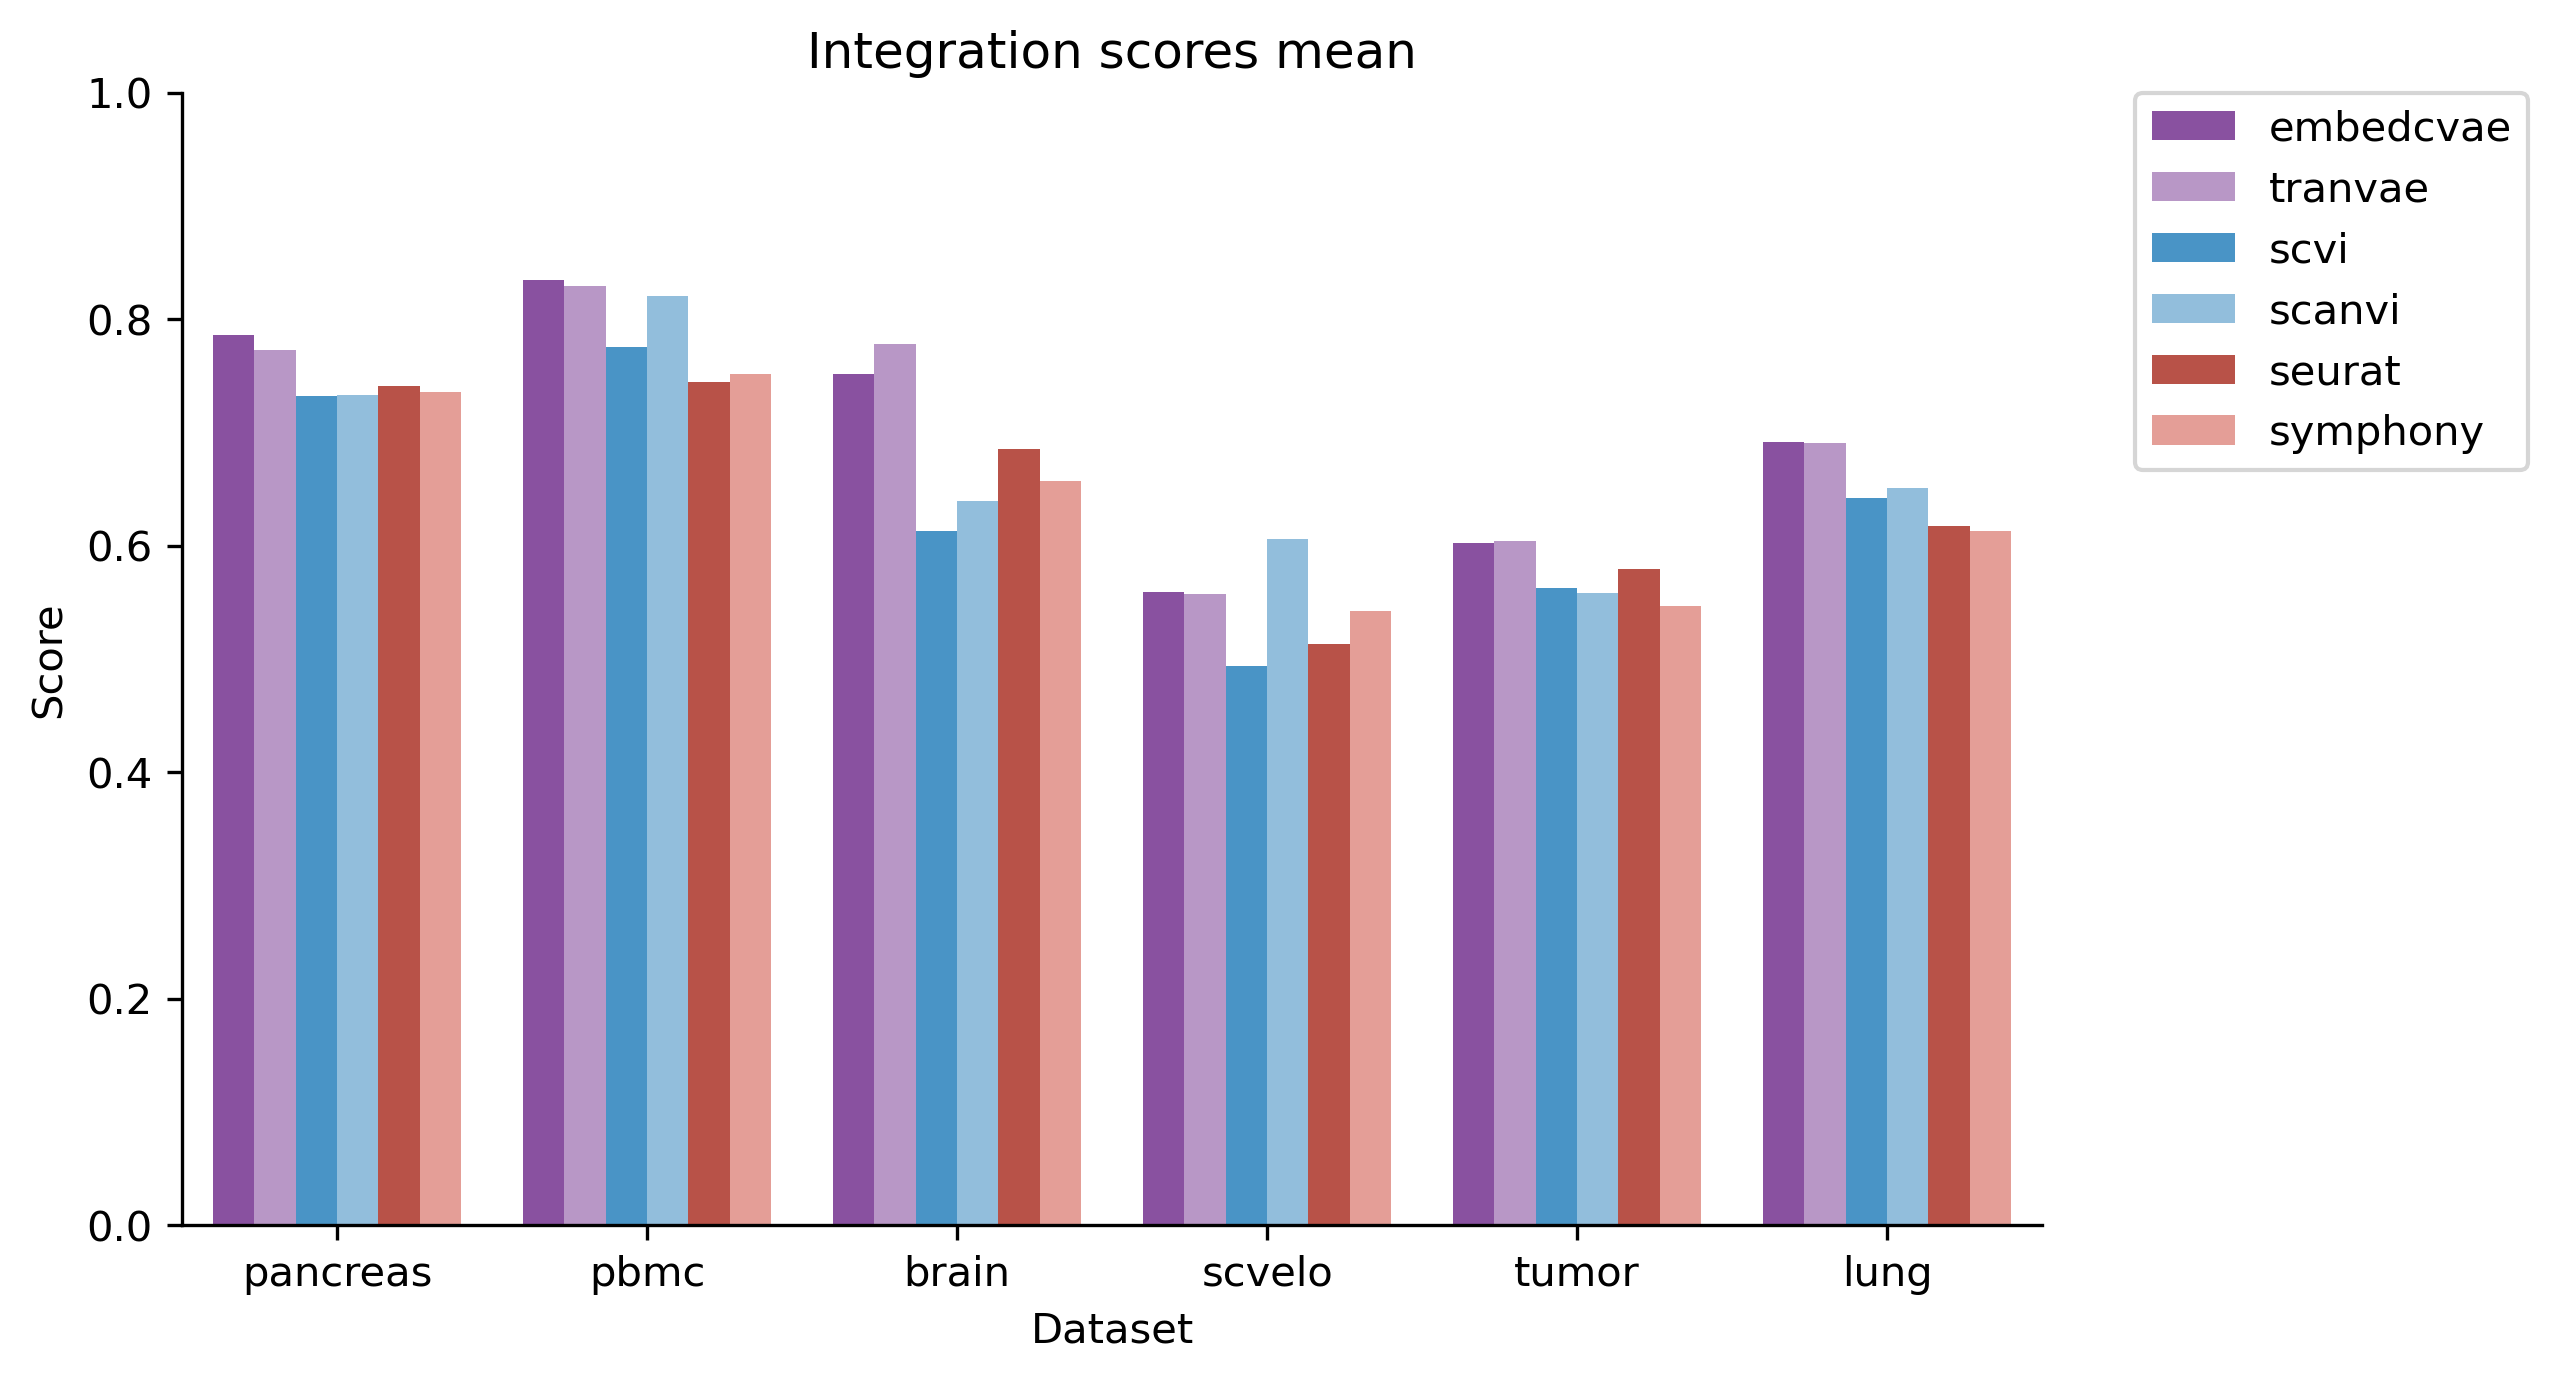

In [31]:
df_plot = results_melt[
    (results_melt['method'].isin(integration_methods))
    & (results_melt['variable'] == 'integration_scores_mean')
]
df_plot['method'] = df_plot['method'].cat.remove_unused_categories()
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(
    x='config.data',
    y='value',
    hue='method',
    data=df_plot,
    palette=palette_dict,
    ax=ax
)
ax.set_title('Integration scores mean')
ax.set_ylabel('Score')
ax.set_xlabel('Dataset')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylim([0, 1])
sns.despine()

<ipython-input-35-93a59642079e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['method'] = df_plot['method'].cat.remove_unused_categories()


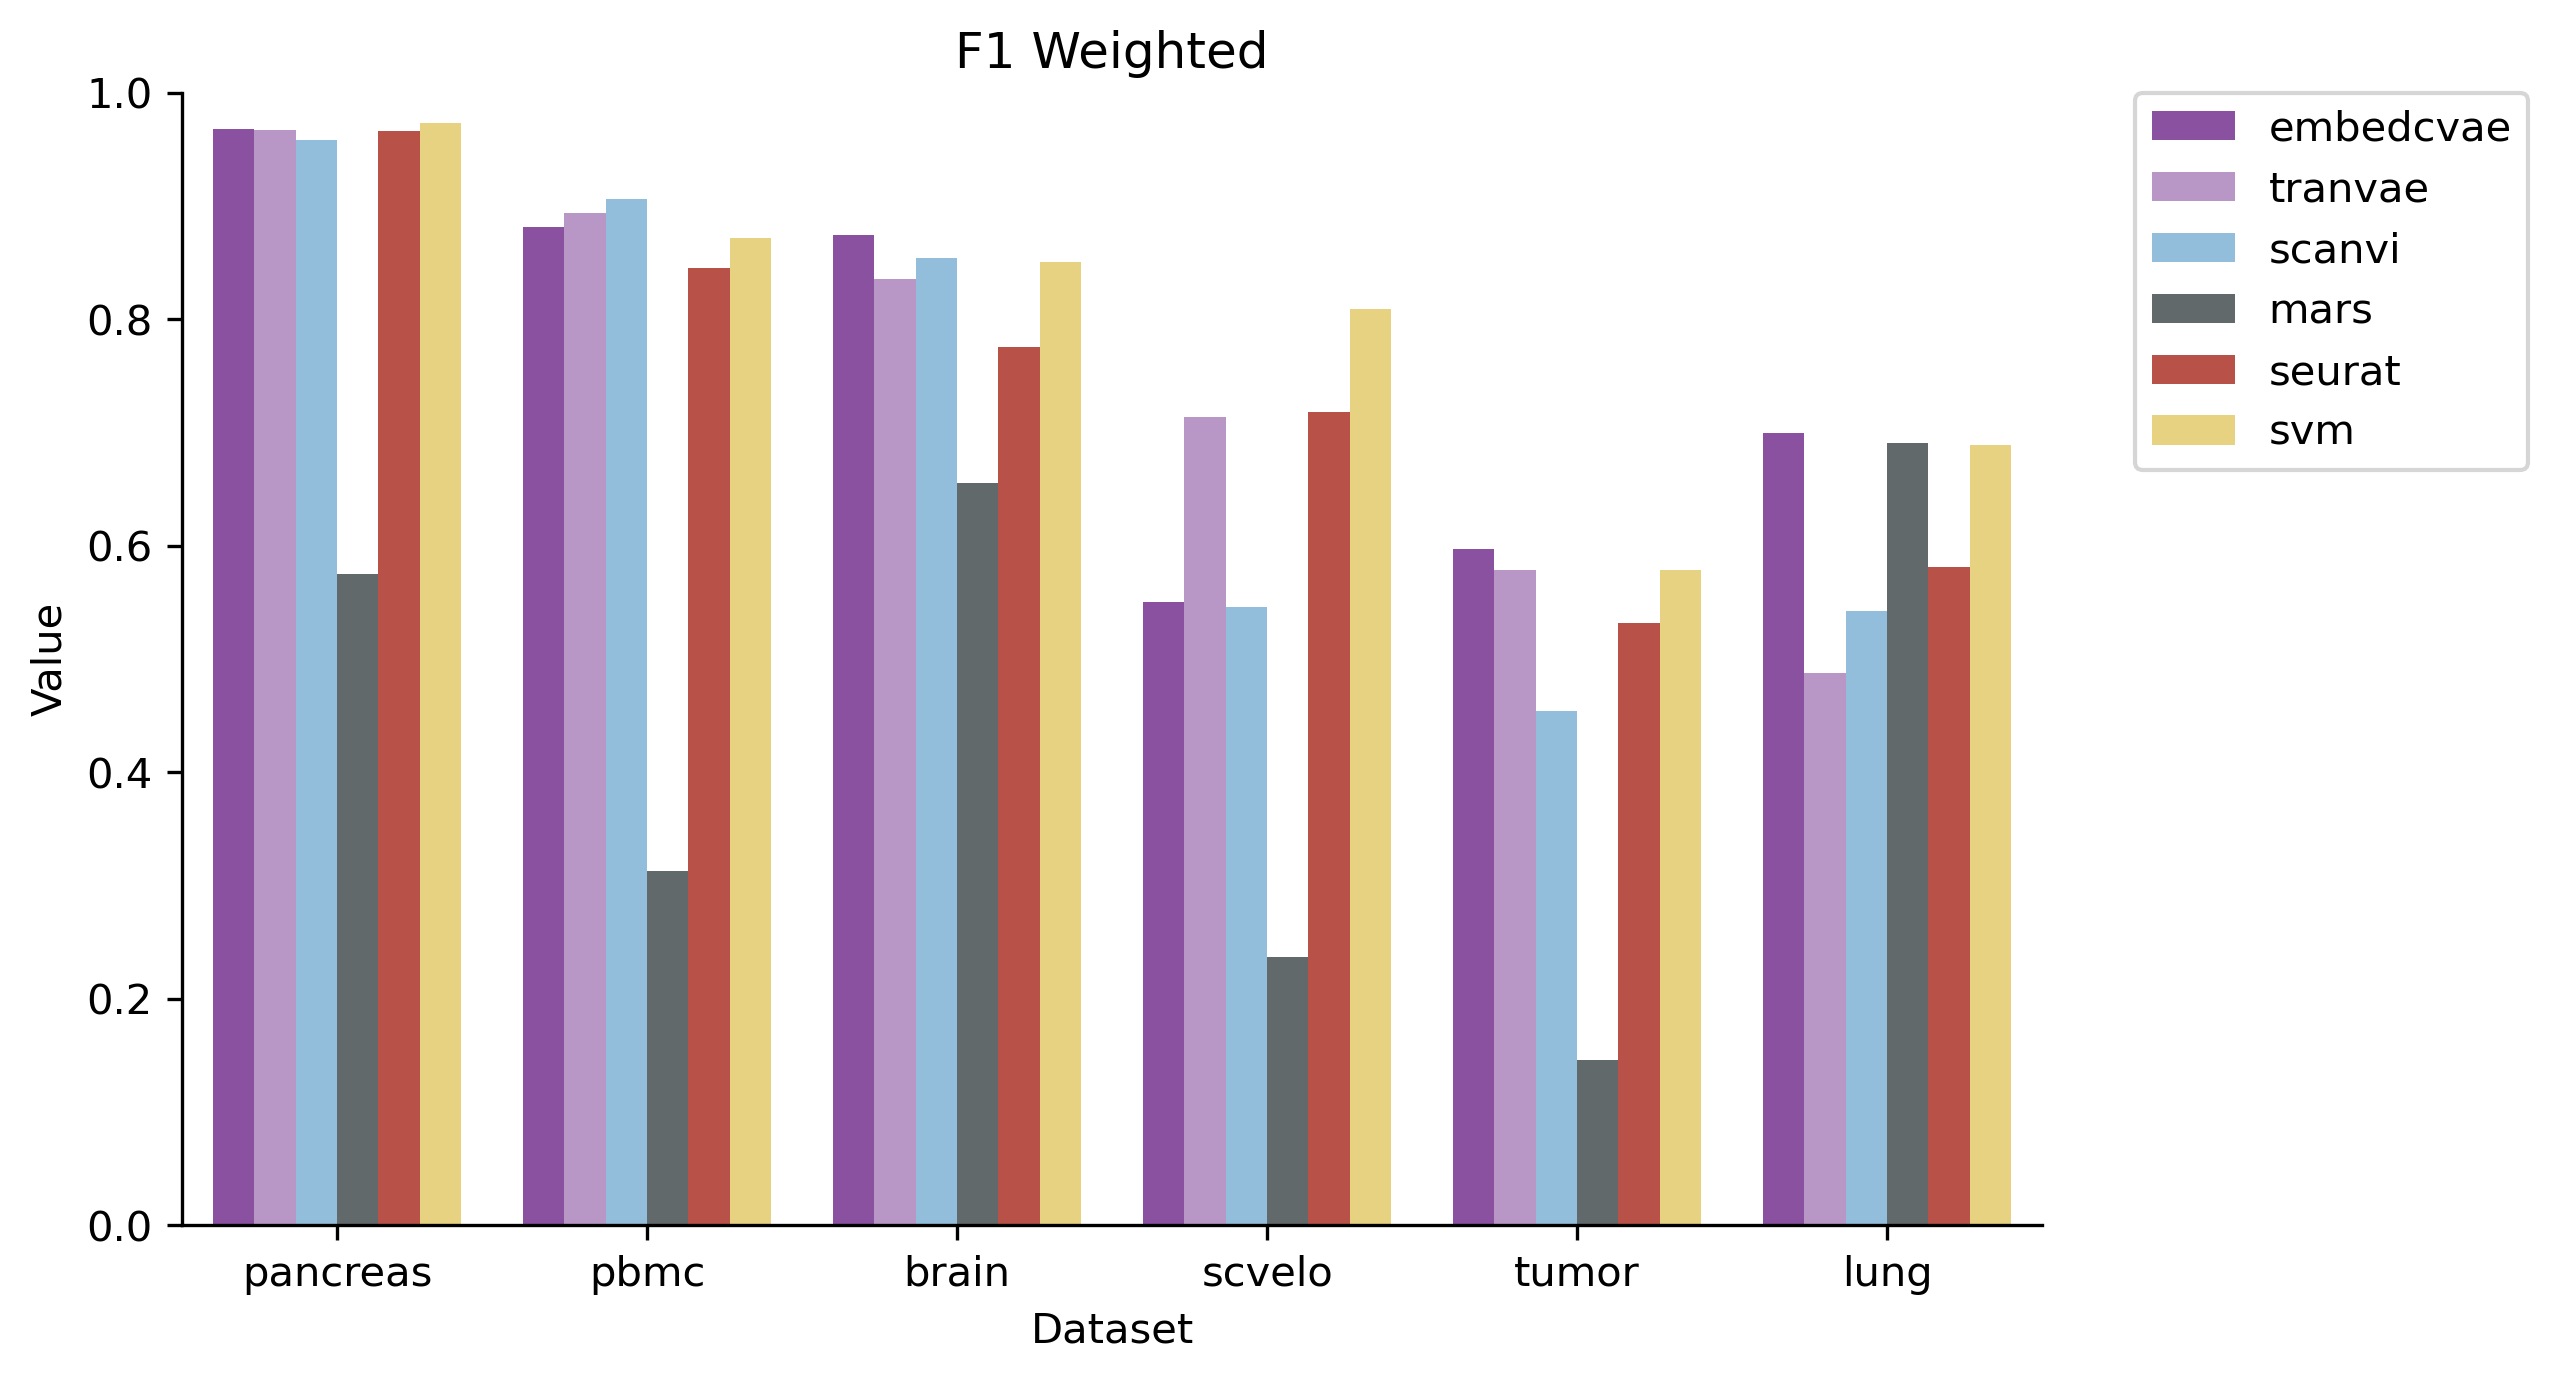

In [35]:
df_plot = results_melt[
    (results_melt['method'].isin(classification_methods))
    & (results_melt['variable'] == 'result.f1-score-weighted')
]
df_plot['method'] = df_plot['method'].cat.remove_unused_categories()
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(
    x='config.data',
    y='value',
    hue='method',
    data=df_plot,
    palette=palette_dict,
    ax=ax
)
ax.set_title('F1 Weighted')
ax.set_ylabel('Value')
ax.set_xlabel('Dataset')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylim([0, 1])
sns.despine()

<ipython-input-33-f441d5ce0861>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['method'] = df_plot['method'].cat.remove_unused_categories()


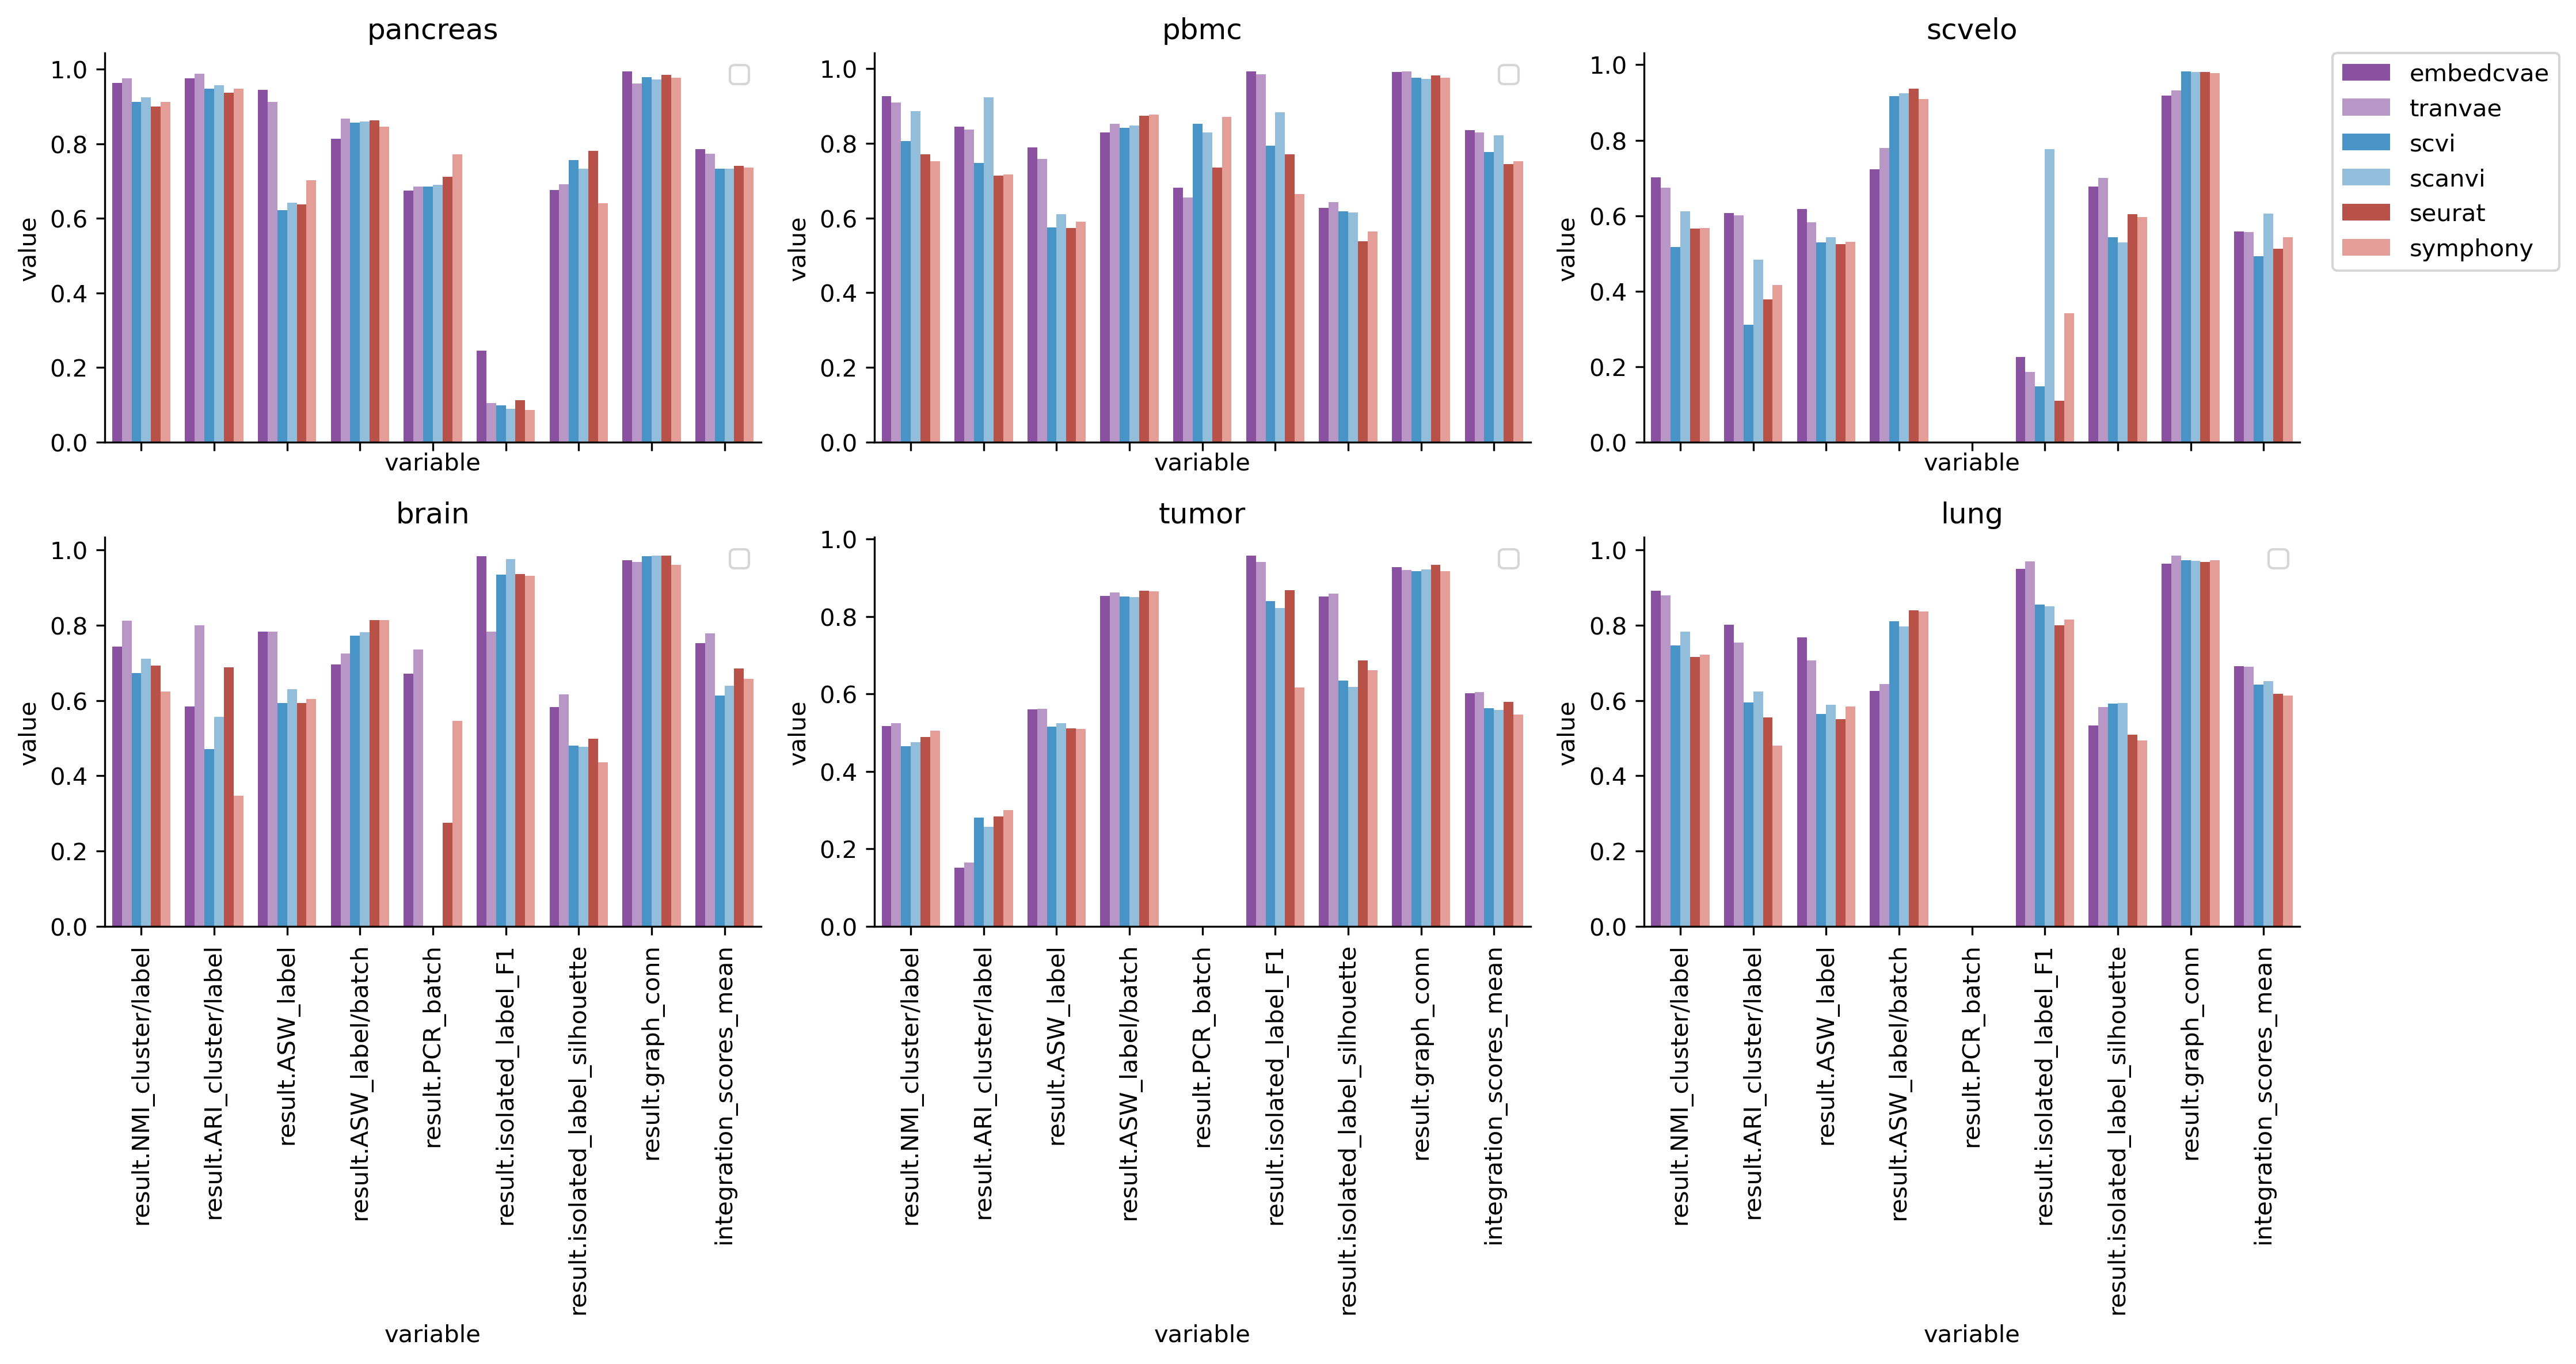

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
ax = ax.flatten()
df_plot = results_melt[
    (~results_melt['variable'].str.contains('f1|accuracy', regex=True))
    & (results_melt['method'].isin(integration_methods))
]
df_plot['method'] = df_plot['method'].cat.remove_unused_categories()

for i, dataset in enumerate(
    ['pancreas', 'pbmc', 'scvelo', 'brain', 'tumor', 'lung']
):
    sns.barplot(
        x='variable', 
        y='value',
        hue='method',
        data=df_plot[df_plot['config.data']==dataset],
        ax=ax[i],
        palette=palette_dict
    )
    if i == 2:
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax[i].legend('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(dataset)
    sns.despine()
fig.tight_layout()

<ipython-input-34-632b324c04ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['method'] = df_plot['method'].cat.remove_unused_categories()


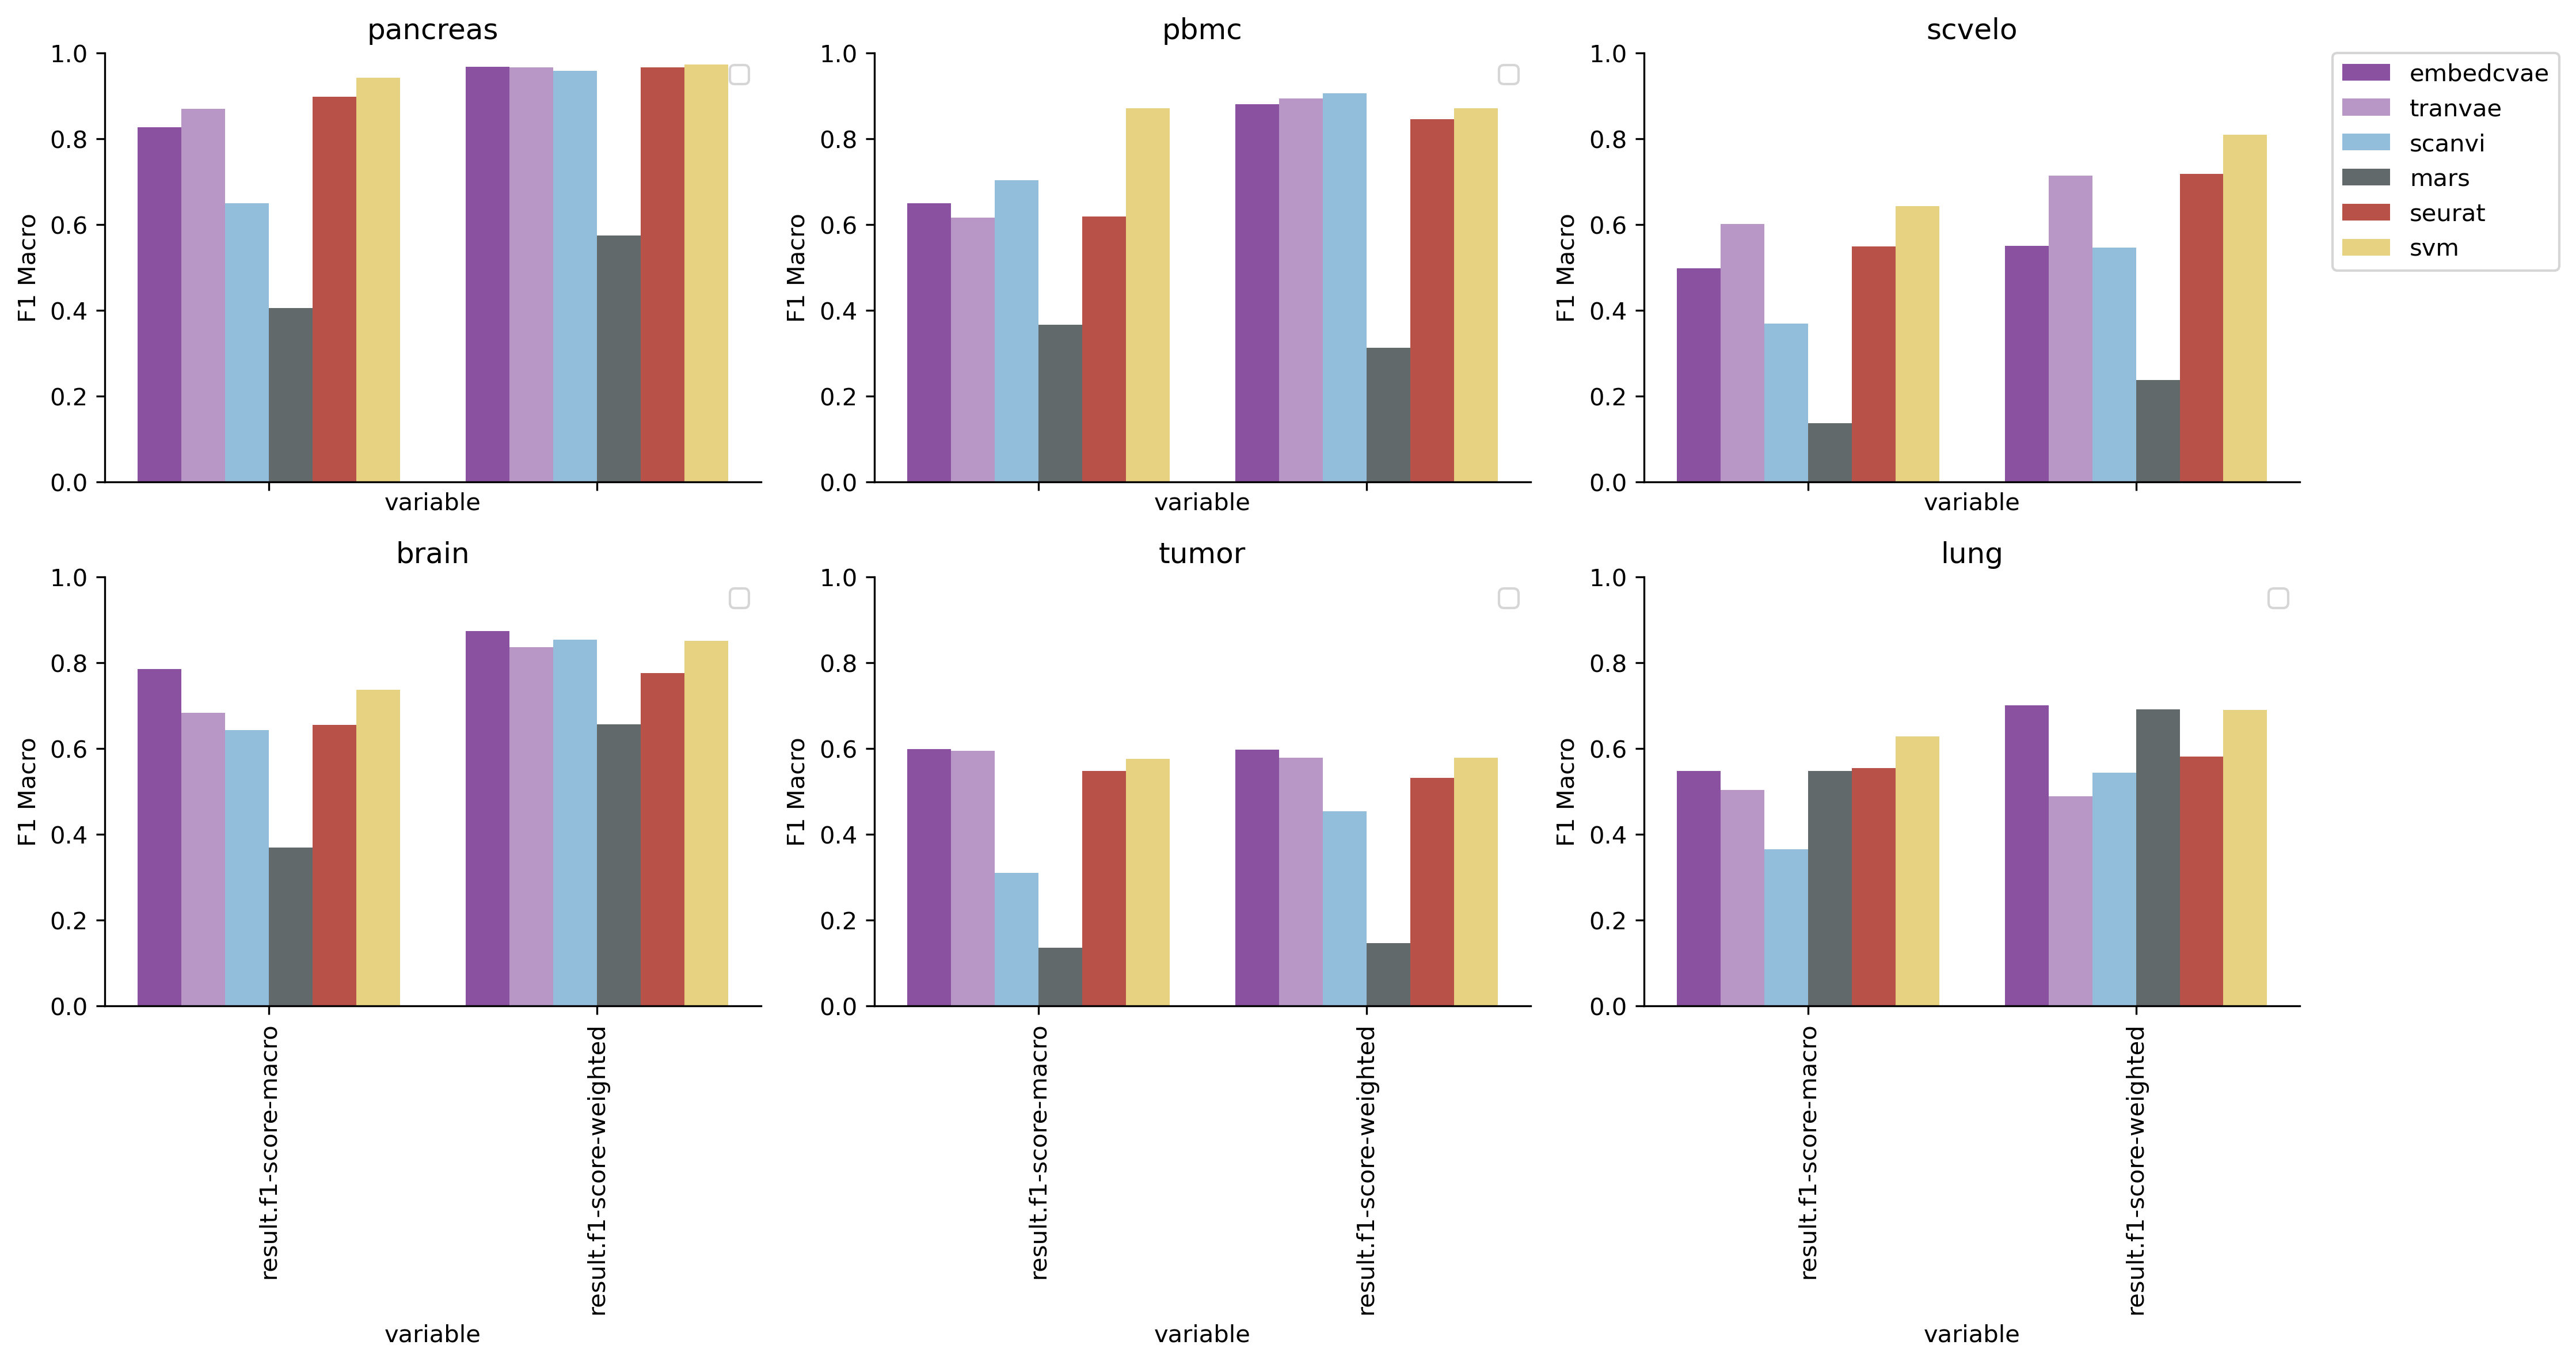

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
ax = ax.flatten()
df_plot = results_melt[
    (results_melt['variable'].str.contains('f1', regex=True))
    & (results_melt['method'].isin(classification_methods))
]
df_plot['method'] = df_plot['method'].cat.remove_unused_categories()

for i, dataset in enumerate(
    ['pancreas', 'pbmc', 'scvelo', 'brain', 'tumor', 'lung']
):
    sns.barplot(
        x='variable', 
        y='value',
        hue='method',
        data=df_plot[df_plot['config.data']==dataset],
        ax=ax[i],
        palette=palette_dict
    )
    if i == 2:
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax[i].legend('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(dataset)
    #ax[i].set_xticklabels((''), (''))
    ax[i].set_ylabel('F1 Macro')
    ax[i].set_ylim([0, 1])
    sns.despine()
fig.tight_layout()